In [1]:
import pandas as pd

# Define years and file pattern
years = range(2009, 2023)
file_pattern = "../Data/{}_census_data.csv"

# List to store processed DataFrames
df_list = []

for year in years:
    file_name = file_pattern.format(year)

    try:
        # Read CSV file
        census_data = pd.read_csv(file_name)

        # Remove 'County' from county_name
        census_data['county_name'] = census_data['county_name'].str.rsplit(' ', n=1).str[0]

        # Save modified file back
        census_data.to_csv(file_name, index=False)
        print(f"Changes saved to: {file_name}")

        # Add 'Year' column and store in list
        census_data['Year'] = year
        df_list.append(census_data)

    except FileNotFoundError:
        print(f"Warning: Could not find {file_name}")
    except Exception as e:
        print(f"Error processing {file_name}: {str(e)}")


Changes saved to: ../Data/2009_census_data.csv
Changes saved to: ../Data/2010_census_data.csv
Changes saved to: ../Data/2011_census_data.csv
Changes saved to: ../Data/2012_census_data.csv
Changes saved to: ../Data/2013_census_data.csv
Changes saved to: ../Data/2014_census_data.csv
Changes saved to: ../Data/2015_census_data.csv
Changes saved to: ../Data/2016_census_data.csv
Changes saved to: ../Data/2017_census_data.csv
Changes saved to: ../Data/2018_census_data.csv
Changes saved to: ../Data/2019_census_data.csv
Changes saved to: ../Data/2020_census_data.csv
Changes saved to: ../Data/2021_census_data.csv
Changes saved to: ../Data/2022_census_data.csv


In [2]:
#Data preprocessing ensuring no - or NaN values
for i, df in enumerate(df_list):
    old = len(df)

    df = df[(df["unemployment %"] != "(X)") & (df["% below poverty line"] != "(X)")]
    df = df[df['median house value']>=0]
    df = df[df['median income']>=0]
    df = df.dropna()

    df_list[i] = df
    
    new = len(df)

    print('\n')
    if new == 0:
        print('all data dropped')
    else:
        print('rows reduced by: ', 1-new/old)




all data dropped


rows reduced by:  0.0003104625892580426


rows reduced by:  0.0003104625892580426


rows reduced by:  0.0003104625892580426


rows reduced by:  0.0003104625892580426


rows reduced by:  0.00031055900621113075


rows reduced by:  0.0009316770186335033


rows reduced by:  0.0009316770186335033


rows reduced by:  0.0006211180124223725


rows reduced by:  0.0009316770186335033


rows reduced by:  0.0006211180124223725


rows reduced by:  0.0018627755355479225


rows reduced by:  0.0009313877677740168


rows reduced by:  0.0012414649286157653


In [3]:
#Combine all years dataframes into one
df_full = pd.concat(df_list)

In [4]:
#Drop any counties that do not exist for every year of data
df_filter = df_full[df_full.groupby('NAME')['NAME'].transform('size').gt(12)]

In [5]:
#Group counties together by using a multiindex
df_filter = df_filter.set_index(['NAME', 'Year'])
df_filter = df_filter.sort_index(level=0)

In [6]:
df_filter

mil pop unemployment %  mean income  \
NAME                             Year                                        
Abbeville County, South Carolina 2010     13.0           14.4      41816.0   
                                 2011     21.0           14.2      43780.0   
                                 2012     16.0           13.7      44676.0   
                                 2013      0.0           14.6      45632.0   
                                 2014      0.0           12.6      45773.0   
...                                        ...            ...          ...   
Ziebach County, South Dakota     2018      0.0           23.1      50017.0   
                                 2019      0.0           24.9      52721.0   
                                 2020      0.0           30.4      62275.0   
                                 2021      0.0           32.4      66610.0   
                                 2022      0.0           32.0      78898.0   

                                       median income  vacant housing units  \
NAME                             Year                                        
Abbeville County, South Carolina 2010        33143.0                2201.0   
                                 2011        34670.0                2271.0   
                                 2012        35067.0                2188.0   
                                 2013        35947.0                2220.0   
                                 2014        35409.0                2279.0   
...                                              ...                   ...   
Ziebach County, South Dakota     2018        37143.0                 258.0   
                                 2019        37400.0                 255.0   
                                 2020        36615.0                 233.0   
                                 2021        38750.0                 213.0   
                                 2022        46023.0                 212.0   

                                       rental vacany rate  \
NAME                             Year                       
Abbeville County, South Carolina 2010                 5.9   
                                 2011                 5.0   
                                 2012                 4.8   
                                 2013                 3.7   
                                 2014                 4.2   
...                                                   ...   
Ziebach County, South Dakota     2018                 7.1   
                                 2019                 5.8   
                                 2020                 5.8   
                                 2021                 8.8   
                                 2022                 9.7   

                                      % below poverty line  \
NAME                             Year                        
Abbeville County, South Carolina 2010                 16.3   
                                 2011                 14.9   
                                 2012                 15.6   
                                 2013                 15.8   
                                 2014                 17.0   
...                                                    ...   
Ziebach County, South Dakota     2018                 32.1   
                                 2019                 32.1   
                                 2020                 31.8   
                                 2021                 34.1   
                                 2022                 33.1   

                                       median house value  state  county  \
NAME                             Year                                      
Abbeville County, South Carolina 2010             85900.0     45       1   
                                 2011             89100.0     45       1   
                                 2012             90300.0     45       1   
                            

In [7]:
display(df_filter.min())
display(df_filter.max())

mil pop                       0.0
unemployment %                0.0
mean income               15294.0
median income             10499.0
vacant housing units         44.0
rental vacany rate            0.0
% below poverty line          0.0
median house value        26000.0
state                           1
county                          1
county_name             Abbeville
state_name                Alabama
dtype: object

mil pop                   86010.0
unemployment %               40.9
mean income              216684.0
median income            170463.0
vacant housing units     245069.0
rental vacany rate           70.6
% below poverty line         64.0
median house value      1441300.0
state                          72
county                        840
county_name               Ziebach
state_name                Wyoming
dtype: object

In [8]:
#Convert to ratios
df_filter[['unemployment %', '% below poverty line', 'rental vacany rate']] = df_filter[['unemployment %', '% below poverty line', 'rental vacany rate']]/100

In [9]:
#Create new feature
df_filter['change in mil'] = df_filter['mil pop'].diff(1)
df_filter['change in mil'] = df_filter.groupby(level = 0)['change in mil'].shift(-1)

In [10]:
#Create X dataset
X = df_filter.reset_index()
X = X.loc[:, [*X.columns[0:10], 'change in mil']].dropna()
X = X.sort_values(by=['Year','NAME'])
display(X)

,NAME,Year,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,change in mil
0,"Abbeville County, South Carolina",2010,13.0,0.144,41816.0,33143.0,2201.0,0.059,0.163,85900.0,8.0
13,"Acadia Parish, Louisiana",2010,33.0,0.067,48844.0,37261.0,3080.0,0.078,0.172,86700.0,-20.0
26,"Accomack County, Virginia",2010,37.0,0.092,53240.0,41372.0,6843.0,0.036,0.097,149800.0,27.0
39,"Ada County, Idaho",2010,1204.0,0.066,72123.0,55835.0,10170.0,0.062,0.069,214500.0,-214.0
52,"Adair County, Iowa",2010,0.0,0.045,53911.0,45202.0,358.0,0.043,0.057,93800.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
41533,"Yuma County, Arizona",2021,4001.0,0.084,68613.0,52563.0,18974.0,0.059,0.154,148900.0,-79.0
41546,"Yuma County, Colorado",2021,0.0,0.06,74972.0,56327.0,427.0,0.009,0.104,184400.0,0.0
41559,"Zapata County, Texas",2021,0.0,0.083,60557.0,34406.0,1781.0,0.043,0.276,82800.0,0.0
41572,"Zavala County, Texas",2021,13.0,0.037,54300.0,44573.0,574.0,0.060,0.206,63300.0,6.0


In [11]:
y = df_filter.groupby(level = 0).shift(-1).reset_index()
y = y.loc[:, ['NAME', 'Year',*X.columns[3:10]]].dropna()
y = y.sort_values(by=['Year','NAME'])
display(y)
y = y.loc[:, [*X.columns[3:10]]]

,NAME,Year,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value
0,"Abbeville County, South Carolina",2010,0.142,43780.0,34670.0,2271.0,0.050,0.149,89100.0
13,"Acadia Parish, Louisiana",2010,0.083,51108.0,37970.0,3178.0,0.087,0.169,90900.0
26,"Accomack County, Virginia",2010,0.076,55531.0,41595.0,7208.0,0.043,0.105,153400.0
39,"Ada County, Idaho",2010,0.078,72128.0,55304.0,10328.0,0.057,0.077,206200.0
52,"Adair County, Iowa",2010,0.044,55100.0,47623.0,450.0,0.059,0.069,93300.0
...,...,...,...,...,...,...,...,...,...
41533,"Yuma County, Arizona",2021,0.083,74377.0,56439.0,18130.0,0.058,0.148,173500.0
41546,"Yuma County, Colorado",2021,0.057,81329.0,60118.0,360.0,0.005,0.107,201500.0
41559,"Zapata County, Texas",2021,0.081,56419.0,35061.0,1603.0,0.016,0.315,84800.0
41572,"Zavala County, Texas",2021,0.058,60004.0,49243.0,529.0,0.048,0.21,77300.0


In [12]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(5)

all_splits = list(tscv.split(X, y))
train_0, test_0 = all_splits[0]

In [13]:
#Check to ensure all counties have 2 entries in first split
X.iloc[test_0].groupby('NAME').count().Year.unique()

array([2], dtype=int64)

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

mae_list = []

n_features = ['mean income', 'median income', 'vacant housing units', 'median house value', 'mil pop', 'change in mil']
n_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

c_features = ['NAME']
c_pipeline = Pipeline([
    ('encoder',  OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ("num", n_pipeline, n_features),
        ("cat", c_pipeline, c_features),
    ]
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

for train_index, test_index in all_splits:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_percentage_error(y_test, y_pred, multioutput = 'raw_values')
    mae_list.append(mae)

pd.DataFrame(mae_list, columns = y.columns)



,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value
0,2.985859e+10,0.033342,0.035455,0.075086,2.207949e+12,4.824460e+09,0.033155
1,8.155510e+10,0.031400,0.033204,0.090011,2.775563e+12,3.867726e+10,0.035333
2,4.053914e+11,0.044462,0.045190,0.109276,3.826271e+12,8.966889e+10,0.041622
3,4.076328e+11,0.033224,0.037342,0.127716,6.004315e+12,1.624980e+11,0.044161
4,4.624116e+11,0.050201,0.052224,0.136592,8.381148e+12,1.705476e+11,0.060192


In [15]:
pd.DataFrame(model.predict(X_test), columns = y.columns)

,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value
0,0.071169,63769.023279,45243.544736,2460.301503,0.014221,0.140730,110978.173138
1,0.076753,64651.324760,45781.590204,4056.450618,0.077447,0.161358,135775.090523
2,0.044147,64663.561238,47106.542036,7701.500898,0.033043,0.116186,179048.833041
3,0.031535,97221.459649,72750.220592,7377.681489,0.036718,0.055281,310150.624274
4,0.022750,69056.228923,56369.843444,465.462928,0.088160,0.043228,116398.301515
...,...,...,...,...,...,...,...
6393,0.088902,70118.400690,53497.763592,19083.502767,0.080143,0.152165,154335.417221
6394,-0.001484,77096.248546,58224.383310,379.758100,0.045406,0.058987,198615.091694
6395,0.079761,61858.329163,36848.670291,1741.474343,0.092448,0.281499,91126.635408
6396,0.059097,56930.360110,45050.969919,376.366360,0.055981,0.253451,76499.186427


In [16]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

mae_list = []

n_features = ['mean income', 'median income', 'vacant housing units', 'median house value', 'mil pop', 'change in mil']
n_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

c_features = ['NAME']
c_pipeline = Pipeline([
    ('encoder',  OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ("num", n_pipeline, n_features),
        ("cat", c_pipeline, c_features),
    ]
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(verbose = True, n_jobs = -1))
])

for train_index, test_index in all_splits:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_percentage_error(y_test, y_pred, multioutput = 'raw_values')
    mae_list.append(mae)

pd.DataFrame(mae_list, columns = y.columns)




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4

,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value
0,1.015175e+11,0.030072,0.034319,0.490621,5.828262e+12,3.672989e+10,0.031440
1,2.469448e+11,0.029935,0.032355,0.441797,4.541012e+12,1.503546e+10,0.032356
2,7.045972e+11,0.037536,0.037015,0.426685,5.182624e+12,1.821501e+11,0.037769
3,8.770053e+11,0.034062,0.039919,0.461599,7.762846e+12,2.748266e+11,0.040813
4,8.601467e+11,0.054761,0.053319,0.575603,1.073127e+13,1.859160e+11,0.070557


In [17]:
display(pd.DataFrame(model.predict(X_test), columns = y.columns).min())
display(pd.DataFrame(model.predict(X_test), columns = y.columns).max())

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


unemployment %              0.01071
mean income             19082.70000
median income           13319.50000
vacant housing units      196.49000
rental vacany rate          0.02394
% below poverty line        0.02524
median house value      28067.00000
dtype: float64

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


unemployment %          2.572900e-01
mean income             1.727948e+05
median income           1.300669e+05
vacant housing units    2.019109e+05
rental vacany rate      2.215200e-01
% below poverty line    5.681100e-01
median house value      1.136828e+06
dtype: float64

In [18]:
y = df_filter.groupby(level = 0).shift(-1).reset_index()
y = y.loc[:, ['NAME', 'Year','mean income', 'median income', 'median house value']].dropna()
y = y.sort_values(by=['Year','NAME'])
display(y)
y = y.loc[:, ['mean income', 'median income', 'median house value']]

,NAME,Year,mean income,median income,median house value
0,"Abbeville County, South Carolina",2010,43780.0,34670.0,89100.0
13,"Acadia Parish, Louisiana",2010,51108.0,37970.0,90900.0
26,"Accomack County, Virginia",2010,55531.0,41595.0,153400.0
39,"Ada County, Idaho",2010,72128.0,55304.0,206200.0
52,"Adair County, Iowa",2010,55100.0,47623.0,93300.0
...,...,...,...,...,...
41533,"Yuma County, Arizona",2021,74377.0,56439.0,173500.0
41546,"Yuma County, Colorado",2021,81329.0,60118.0,201500.0
41559,"Zapata County, Texas",2021,56419.0,35061.0,84800.0
41572,"Zavala County, Texas",2021,60004.0,49243.0,77300.0


In [19]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

mae_list = []

n_features = ['mean income', 'median income', 'vacant housing units', 'median house value', 'mil pop', 'change in mil']
n_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

c_features = ['NAME']
c_pipeline = Pipeline([
    ('encoder',  OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ("num", n_pipeline, n_features),
        ("cat", c_pipeline, c_features),
    ]
)

model_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

for train_index, test_index in all_splits:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_linear.fit(X_train, y_train)
    y_pred = model_linear.predict(X_test)
    
    mae = mean_absolute_percentage_error(y_test, y_pred, multioutput = 'raw_values')
    mae_list.append(mae)

mae_linear = pd.DataFrame(mae_list, columns = y.columns)
mae_linear


,mean income,median income,median house value
0,0.033342,0.035455,0.033155
1,0.031400,0.033204,0.035333
2,0.044462,0.045190,0.041622
3,0.033224,0.037342,0.044161
4,0.050201,0.052224,0.060192


In [20]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

mae_list = []

n_features = ['mean income', 'median income', 'vacant housing units', 'median house value', 'mil pop', 'change in mil']
n_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

c_features = ['NAME']
c_pipeline = Pipeline([
    ('encoder',  OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ("num", n_pipeline, n_features),
        ("cat", c_pipeline, c_features),
    ]
)

model_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(verbose = True, n_jobs = -1))
])

for train_index, test_index in all_splits:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_forest.fit(X_train, y_train)
    y_pred = model_forest.predict(X_test)
    
    mae = mean_absolute_percentage_error(y_test, y_pred, multioutput = 'raw_values')
    mae_list.append(mae)

mae_forest = pd.DataFrame(mae_list, columns = y.columns)
mae_forest



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4

,mean income,median income,median house value
0,0.028999,0.033503,0.031407
1,0.028800,0.031183,0.032419
2,0.035842,0.035489,0.037252
3,0.032961,0.038180,0.040681
4,0.053771,0.052720,0.070798


In [21]:
#Uncomment to run but it takes a long time
'''%%time
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


mae_list = []

n_features = ['mean income', 'median income', 'vacant housing units', 'median house value', 'mil pop', 'change in mil']
n_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

c_features = ['NAME']
c_pipeline = Pipeline([
    ('encoder',  OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ("num", n_pipeline, n_features),
        ("cat", c_pipeline, c_features),
    ]
)

model_NN = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(verbose = True, warm_start = True, hidden_layer_size=(50,)))
])

for train_index, test_index in all_splits:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_NN.fit(X_train, y_train)
    y_pred = model_NN.predict(X_test)
    
    mae = mean_absolute_percentage_error(y_test, y_pred, multioutput = 'raw_values')
    mae_list.append(mae)

mae_NN = pd.DataFrame(mae_list, columns = y.columns)
mae_NN
'''

'%%time\nfrom sklearn.model_selection import cross_validate\nfrom sklearn.neural_network import MLPRegressor\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.metrics import mean_absolute_percentage_error\nfrom sklearn.preprocessing import MinMaxScaler, OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\n\n\nmae_list = []\n\nn_features = [\'mean income\', \'median income\', \'vacant housing units\', \'median house value\', \'mil pop\', \'change in mil\']\nn_pipeline = Pipeline([\n    (\'scaler\', MinMaxScaler())\n])\n\nc_features = [\'NAME\']\nc_pipeline = Pipeline([\n    (\'encoder\',  OneHotEncoder())\n])\n\npreprocessor = ColumnTransformer(\n    transformers = [\n        ("num", n_pipeline, n_features),\n        ("cat", c_pipeline, c_features),\n    ]\n)\n\nmodel_NN = Pipeline([\n    (\'preprocessor\', preprocessor),\n    (\'model\', MLPRegressor(verbose = True, warm_start = True, hidden_layer_size=(50,)))\n])\n\nfor train_index, test_index in all_splits:\n    X_train, 

In [22]:
#mae_NN.mean()

In [23]:
mae_forest.mean()

mean income           0.036075
median income         0.038215
median house value    0.042511
dtype: float64

In [24]:
mae_linear.mean()

mean income           0.038526
median income         0.040683
median house value    0.042893
dtype: float64

In [25]:
pd.DataFrame(model_forest.named_steps['model'].feature_importances_)

,0
0,2.710063e-02
1,5.190417e-03
2,1.215850e-03
3,9.630349e-01
4,6.391818e-04
...,...
3200,2.447231e-07
3201,1.528993e-06
3202,3.289915e-07
3203,1.603778e-07


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0

[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurr

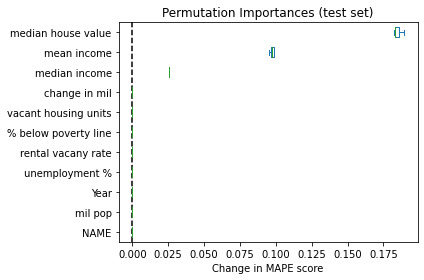

In [26]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(model_forest, X_test, y_test, scoring = 'neg_mean_absolute_percentage_error')

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Change in MAPE score")
ax.figure.tight_layout()

(array([9.19045243e-06, 1.44421395e-05, 1.18162960e-05, 1.18162960e-05,
        1.70679831e-05, 7.87753066e-06, 2.88842791e-05, 1.31292178e-05,
        4.20134968e-05, 1.70679831e-05, 3.15101226e-05, 3.41359662e-05,
        3.93876533e-05, 4.07005751e-05, 7.48365412e-05, 6.95848541e-05,
        8.92786808e-05, 1.07659586e-04, 1.60176457e-04, 2.25822545e-04,
        3.21665835e-04, 4.88406901e-04, 1.04114697e-03, 2.25953838e-03,
        1.06202242e-02, 2.87385448e-02, 2.16106924e-03, 1.05165034e-03,
        5.85563112e-04, 3.25604600e-04, 2.28448389e-04, 1.89060736e-04,
        1.35230943e-04, 1.15537116e-04, 1.18162960e-04, 8.14011501e-05,
        7.87753066e-05, 6.69590106e-05, 5.12039493e-05, 4.85781057e-05,
        5.38297928e-05, 2.49455137e-05, 2.75713573e-05, 2.75713573e-05,
        2.75713573e-05, 2.10067484e-05, 1.83809049e-05, 1.18162960e-05,
        1.57550613e-05, 1.83809049e-05]),
 array([-500., -480., -460., -440., -420., -400., -380., -360., -340.,
        -320., -300., -

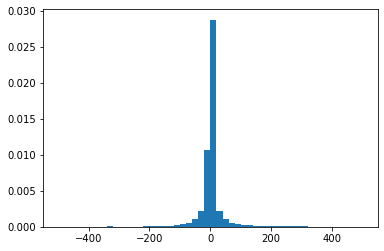

In [27]:
#Most changes in mil are near 0
plt.hist(df_filter['change in mil'], density = True, bins = 50, range = (-500, 500))

In [28]:
index = pd.DataFrame(abs((model_forest.predict(X_test)-y_test)/y_test).mean(axis = 1)).sort_values(by = 0, ascending = False)[0:4].index

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [29]:
names = X_test[X_test.index.isin(index)].NAME

NAME
Daggett County, Utah             AxesSubplot(0.125,0.125;0.775x0.755)
Harding County, New Mexico       AxesSubplot(0.125,0.125;0.775x0.755)
Issaquena County, Mississippi    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

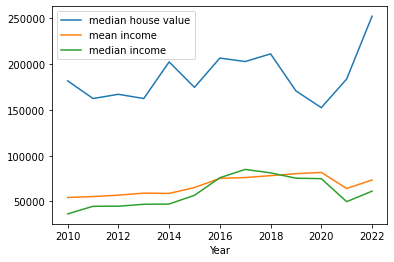

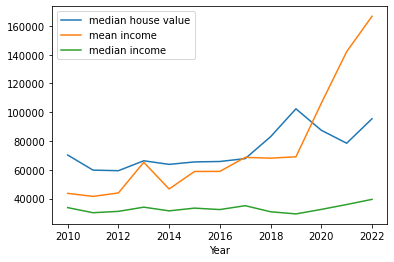

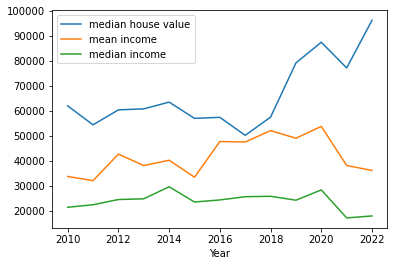

In [30]:
df_r = df_filter.reset_index()
df_r = df_r[df_r.NAME.isin(names)]
df_r.groupby('NAME').plot(x = 'Year', y = ['median house value', 'mean income', 'median income'])


In [31]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Maximum number of levels in tree
max_depth = [2,4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_grid = {'model__n_estimators': n_estimators,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf
             }

Grid = GridSearchCV(model_forest, param_grid = param_grid, cv = tscv, n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error')
Grid.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.1s finished


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['mean '
                                                                          'income',
                                                                          'median '
                                                                          'income',
                                                                          'vacant '
                                                                          'housing '
                                                             

In [32]:
df_cv = pd.DataFrame(Grid.cv_results_)
df_cv['mean_test_score'] = df_cv['mean_test_score']*-1

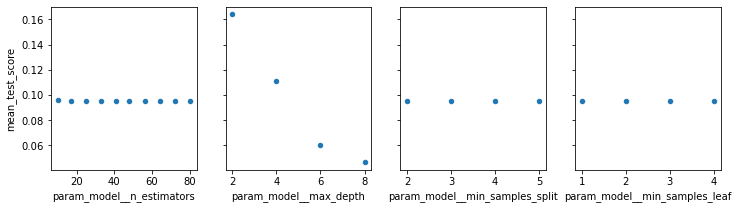

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey = True)

for i, p in enumerate(param_grid.keys()):
    df_cv.groupby('param_'+p).mean().reset_index().plot(y = 'mean_test_score', x = 'param_'+p, kind = 'scatter', ax = axes[i])